In [74]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))

from lib.data_preparation import DataPreparation
from lib.preprocessing_data import Preprocessing
from lib.vectorization import Vectorization


data_set = DataPreparation().load_data()
data_set = Preprocessing().tokenization(data_set)

train_df = data_set.sample(frac=1, random_state=1).reset_index(drop=True, inplace=True)

split_index_1 = int(len(data_set) * 0.7)
split_index_2 = int(len(data_set) * 0.8)


train_df, test_df, validation_df = data_set[:split_index_1], data_set[split_index_1:split_index_2], data_set[split_index_2:]

len(train_df), len(test_df), len(validation_df)

(2490, 356, 712)

In [81]:
# from sklearn.model_selection import train_test_split

# X = data_set['tweet']  # Input features
# y = data_set['sentiment']  # Labels
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = train_df['tweet']
y_train = train_df['sentiment'].to_numpy().astype(str)

X_test = test_df['tweet']
y_test = test_df['sentiment'].to_numpy().astype(str)


X_validation = validation_df['tweet']
y_validation = validation_df['sentiment'].to_numpy().astype(str)

X_train_vector = Vectorization.vectorize_with_tfidf(train_df)
X_test_vector = Vectorization.vectorize_with_tfidf(test_df)
# X_train_vector.shape, X_test_vector.shape

# y = data_set['sentiment'].to_numpy().astype(str)
# X_train_vectors = vectorizer.fit_transform(X_train)
# X_test_vectors = vectorizer.transform(X_test)


In [82]:
# vocab = {word for tweet in X_train for word in tweet}

# word_to_index = {word: i + 1 for i, word in enumerate(sorted(vocab))}
# index_to_word = {i: word for word, i in word_to_index.items()}

# X_train = [[word_to_index[word] for word in tweet if word in word_to_index] for tweet in X_train]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
print(X_train_vector.shape)  # Should match the number of features
print(X_test_vector.shape)



(2490, 4062)
(356, 4062)
(2490,)


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(X_train_vector, y_train)
y_pred = clf.predict(X_test_vector)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       1.00      0.13      0.24       356
    positive       0.00      0.00      0.00         0

    accuracy                           0.13       356
   macro avg       0.33      0.04      0.08       356
weighted avg       1.00      0.13      0.24       356



/workspaces/Tweets_42/ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/Tweets_42/ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/Tweets_42/ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


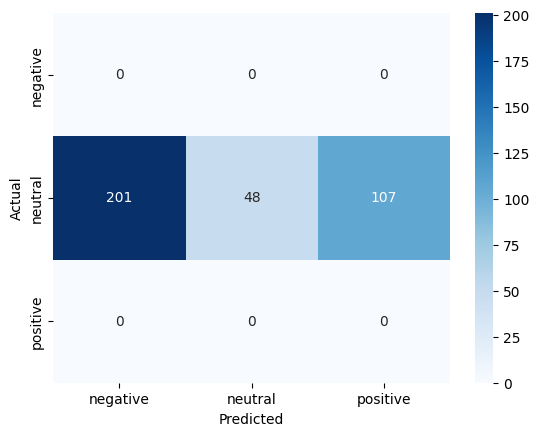

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

